# Assignment 2 - Advance Machine Learning

### Davide Brinati
### Matricola 771458

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pickle      #Importo il dataset

x_train = pickle.load(open("D:/uni/SECONDO ANNO/ADVANCE MACHINE LEARNING/Assignment 2/data/x_train.obj","rb"))

x_test = pickle.load(open("D:/uni/SECONDO ANNO/ADVANCE MACHINE LEARNING/Assignment 2/data/x_test.obj","rb"))

y_train = pickle.load(open("D:/uni/SECONDO ANNO/ADVANCE MACHINE LEARNING/Assignment 2/data/y_train.obj","rb"))

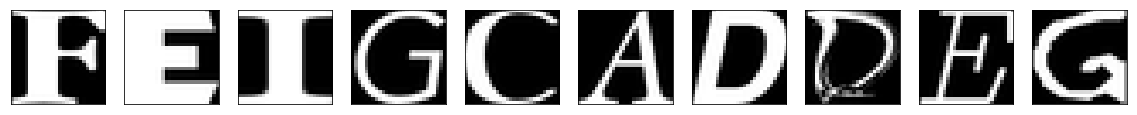

In [3]:
n = 10  # Alcune immagini del train
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
x_train.shape

(11829, 28, 28, 1)

In [5]:
y_train.shape

(11829, 10)

In [6]:
x_test.shape

(5070, 28, 28, 1)

Dal train creo train e validation

In [7]:
from sklearn.model_selection import train_test_split

x_train2, x_validation, y_train2, y_validation = train_test_split(x_train, y_train, test_size = 0.25)

## Si costruisce l'autoencoder

In [8]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

C:\Users\done-\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
encoding_dim = 32  #32 floats -> dato che l'input è composto da 28x28=784, utilizzando un fattore di compressione pari a 24.5 (784/24.5)

input_img = Input(shape=(784,))
# encode
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decode
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [10]:
encoder = Model(input_img, encoded)

In [11]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

### Si preparano i dati di input

In [13]:
print(x_train.dtype)
print(y_train.dtype)
print(x_test.dtype)

int16
float64
int16


#### Si procede col cambiare il dtype in float32 e si effettua un reshape dei dati in input in modo da avere un imput size di 784

In [14]:
from keras.utils import to_categorical
from keras.utils import np_utils

In [15]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(11829, 784)
(5070, 784)


In [16]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 11829 samples, validate on 5070 samples
Epoch 1/50
11829/11829 [==============================] - 4s 348us/step - loss: 0.6894 - val_loss: 0.6795
Epoch 2/50
11829/11829 [==============================] - 1s 66us/step - loss: 0.6591 - val_loss: 0.6375
Epoch 3/50
11829/11829 [==============================] - 1s 66us/step - loss: 0.6228 - val_loss: 0.6084
Epoch 4/50
11829/11829 [==============================] - 1s 66us/step - loss: 0.5925 - val_loss: 0.5760
Epoch 5/50
11829/11829 [==============================] - 1s 66us/step - loss: 0.5588 - val_loss: 0.5428
Epoch 6/50
11829/11829 [==============================] - 1s 66us/step - loss: 0.5254 - val_loss: 0.5106
Epoch 7/50
11829/11829 [==============================] - 1s 67us/step - loss: 0.4940 - val_loss: 0.4812
Epoch 8/50
11829/11829 [==============================] - 1s 66us/step - loss: 0.4665 - val_loss: 0.4561
Epoch 9/50
11829/11829 [==============================] - 1s 66us/step - loss: 0.4440 - val_loss: 0.4362
Epoch

In [17]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

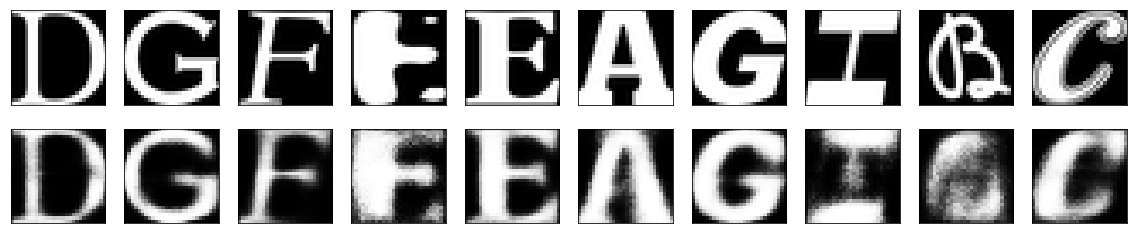

In [18]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Si utilizza ora un Deep Autoencoder

In [19]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [20]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

histor = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 11829 samples, validate on 5070 samples
Epoch 1/50
11829/11829 [==============================] - 3s 221us/step - loss: 0.6921 - val_loss: 0.6907
Epoch 2/50
11829/11829 [==============================] - 1s 106us/step - loss: 0.6869 - val_loss: 0.6779
Epoch 3/50
11829/11829 [==============================] - 1s 107us/step - loss: 0.6553 - val_loss: 0.6319
Epoch 4/50
11829/11829 [==============================] - 1s 106us/step - loss: 0.6229 - val_loss: 0.6183
Epoch 5/50
11829/11829 [==============================] - 1s 107us/step - loss: 0.6115 - val_loss: 0.6046
Epoch 6/50
11829/11829 [==============================] - 1s 105us/step - loss: 0.5906 - val_loss: 0.5830
Epoch 7/50
11829/11829 [==============================] - 1s 112us/step - loss: 0.5732 - val_loss: 0.5772
Epoch 8/50
11829/11829 [==============================] - 1s 111us/step - loss: 0.5569 - val_loss: 0.5436
Epoch 9/50
11829/11829 [==============================] - 1s 117us/step - loss: 0.5270 - val_loss: 0.49

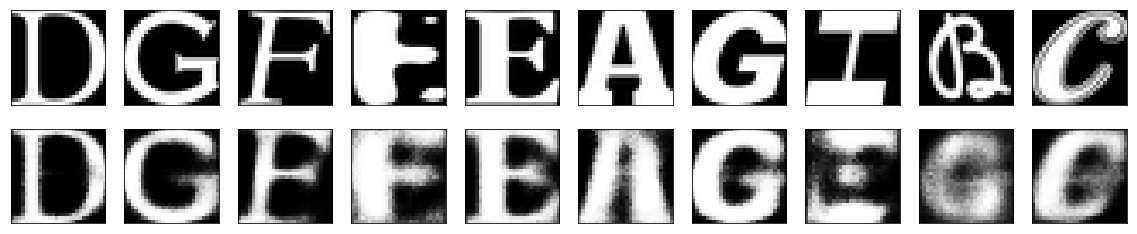

In [21]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Alleno questo modello per la predizione e lo testo sul validation

In [22]:
num_classes = 10

den = Dense(64, activation='relu')(encoded)
out = Dense(num_classes, activation='softmax')(den)

full_model = Model(input_img,out)

In [23]:
import keras 
for l1,l2 in zip(full_model.layers[:3],autoencoder.layers[0:3]):
    l1.set_weights(l2.get_weights())
for layer in full_model.layers[0:3]:
    layer.trainable = True

In [24]:
x_train2.dtype

dtype('int16')

In [25]:
x_train2.shape

(8871, 28, 28, 1)

In [26]:
x_validation.dtype

dtype('int16')

In [27]:
x_validation.shape

(2958, 28, 28, 1)

Adatto anche Validation e Train

In [28]:
x_train2 = x_train2.astype('float32') / 255.
x_validation = x_validation.astype('float32') / 255.
x_train3 = x_train2.reshape((len(x_train2), np.prod(x_train2.shape[1:])))
x_validation2 = x_validation.reshape((len(x_validation), np.prod(x_validation.shape[1:])))

In [29]:
print(x_train3.shape)
print(x_validation2.shape)

(8871, 784)
(2958, 784)


In [30]:
print(y_train2.shape)
print(y_validation.shape)

(8871, 10)
(2958, 10)


In [31]:
fBestModel = 'best_model_over.h5'
best_model = ModelCheckpoint(fBestModel, monitor = 'val_acc', verbose=1, save_best_only=True) #Imposto questa callback, in modo che il modello salvi i parametri migliori

In [32]:
full_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy'])
history = full_model.fit(x_train3, y_train2, batch_size=64,epochs=50,verbose=1, validation_data=(x_validation2, y_validation), callbacks=[best_model])

Train on 8871 samples, validate on 2958 samples
Epoch 1/50
8871/8871 [==============================] - 3s 360us/step - loss: 0.7349 - acc: 0.7907 - val_loss: 0.4213 - val_acc: 0.8786

Epoch 00001: val_acc improved from -inf to 0.87863, saving model to best_model_over.h5
Epoch 2/50
8871/8871 [==============================] - 2s 240us/step - loss: 0.3860 - acc: 0.8886 - val_loss: 0.3707 - val_acc: 0.8901

Epoch 00002: val_acc improved from 0.87863 to 0.89013, saving model to best_model_over.h5
Epoch 3/50
8871/8871 [==============================] - 2s 256us/step - loss: 0.3256 - acc: 0.9063 - val_loss: 0.3851 - val_acc: 0.8834

Epoch 00003: val_acc did not improve from 0.89013
Epoch 4/50
8871/8871 [==============================] - 2s 256us/step - loss: 0.2889 - acc: 0.9153 - val_loss: 0.3328 - val_acc: 0.8993

Epoch 00004: val_acc improved from 0.89013 to 0.89926, saving model to best_model_over.h5
Epoch 5/50
8871/8871 [==============================] - 2s 269us/step - loss: 0.2561 - 

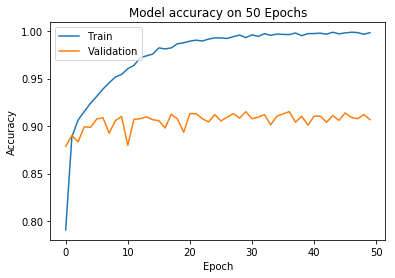

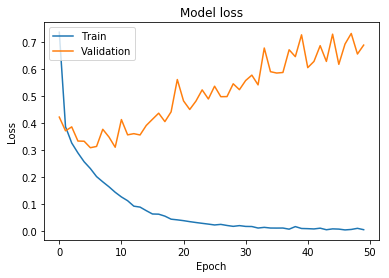

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy on 50 Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
#Carico i pesi del miglior modello trovato precedentemente nelle 50 epoche di apprendimento
full_model.load_weights("best_model_over.h5")

full_model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
full_model.evaluate(x_validation2, y_validation)

2958/2958 [==============================] - 1s 221us/step


[0.5861589859433074, 0.9151453684116232]

# Si utilizza un convolutional Autoencoder

In [36]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [37]:
x_train2.shape

(8871, 28, 28, 1)

In [38]:
x_validation.shape

(2958, 28, 28, 1)

Faccio un reshape del train e del test, dato che alla rete convoluzionale passerò matrici 28x28

In [41]:
x_train = x_train.reshape(11829, 28, 28, 1)

In [42]:
x_test = x_test.reshape(5070, 28, 28, 1)

In [43]:
history2 = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 11829 samples, validate on 5070 samples
Epoch 1/50
11829/11829 [==============================] - 11s 905us/step - loss: 0.6636 - val_loss: 0.5667
Epoch 2/50
11829/11829 [==============================] - 6s 549us/step - loss: 0.5468 - val_loss: 0.4992
Epoch 3/50
11829/11829 [==============================] - 6s 549us/step - loss: 0.4605 - val_loss: 0.4611
Epoch 4/50
11829/11829 [==============================] - 6s 548us/step - loss: 0.4059 - val_loss: 0.3921
Epoch 5/50
11829/11829 [==============================] - 6s 549us/step - loss: 0.3752 - val_loss: 0.3739
Epoch 6/50
11829/11829 [==============================] - 7s 550us/step - loss: 0.3539 - val_loss: 0.3575
Epoch 7/50
11829/11829 [==============================] - 7s 554us/step - loss: 0.3395 - val_loss: 0.3288
Epoch 8/50
11829/11829 [==============================] - 7s 554us/step - loss: 0.3287 - val_loss: 0.3191
Epoch 9/50
11829/11829 [==============================] - 7s 551us/step - loss: 0.3190 - val_loss: 0.3

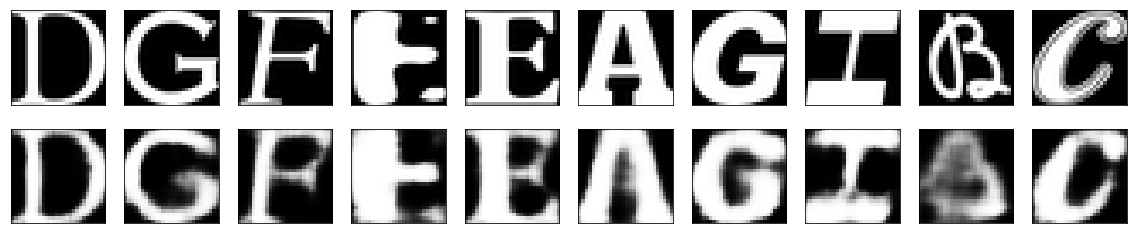

In [44]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Ora utilizzo ora la rete Convoluzionale come modello per predirre, e lo testo sul validation

In [45]:
from keras.layers import Flatten
num_classes = 10

flat = Flatten()(encoded)  
den = Dense(64, activation='relu')(flat)
out = Dense(num_classes, activation='softmax')(den)

convol_model = Model(input_img,out)

In [46]:
fBestModel = 'best_model_conv.h5'
best_model = ModelCheckpoint(fBestModel, monitor = 'val_acc', verbose=1, save_best_only=True) #Imposto questa callback, in modo che il modello salvi i parametri migliori
convol_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy'])
history3 = convol_model.fit(x_train2, y_train2, batch_size=64,epochs=50,verbose=1, validation_data = (x_validation, y_validation), callbacks=[best_model])

Train on 8871 samples, validate on 2958 samples
Epoch 1/50
8871/8871 [==============================] - 5s 600us/step - loss: 0.7777 - acc: 0.7740 - val_loss: 0.4245 - val_acc: 0.8773

Epoch 00001: val_acc improved from -inf to 0.87728, saving model to best_model_conv.h5
Epoch 2/50
8871/8871 [==============================] - 4s 436us/step - loss: 0.3728 - acc: 0.8969 - val_loss: 0.3641 - val_acc: 0.8891

Epoch 00002: val_acc improved from 0.87728 to 0.88911, saving model to best_model_conv.h5
Epoch 3/50
8871/8871 [==============================] - 4s 441us/step - loss: 0.3166 - acc: 0.9096 - val_loss: 0.3172 - val_acc: 0.8976

Epoch 00003: val_acc improved from 0.88911 to 0.89757, saving model to best_model_conv.h5
Epoch 4/50
8871/8871 [==============================] - 4s 449us/step - loss: 0.2810 - acc: 0.9189 - val_loss: 0.3094 - val_acc: 0.9026

Epoch 00004: val_acc improved from 0.89757 to 0.90264, saving model to best_model_conv.h5
Epoch 5/50
8871/8871 [=========================

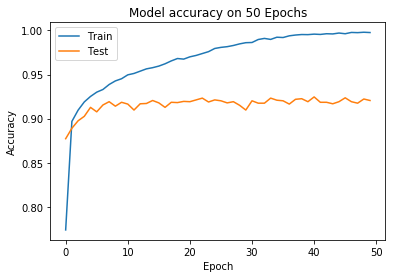

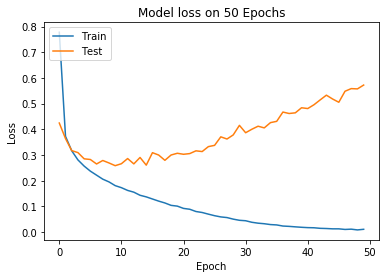

In [47]:
# Plot training & validation accuracy values
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model accuracy on 50 Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss on 50 Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [48]:
#Carico i pesi del miglior modello trovato precedentemente nelle 50 epoche di apprendimento
convol_model.load_weights("best_model_conv.h5")

convol_model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
convol_model.evaluate(x_validation, y_validation)

2958/2958 [==============================] - 1s 259us/step


[0.48082672560901113, 0.9246112238401654]

### Confronto modelli

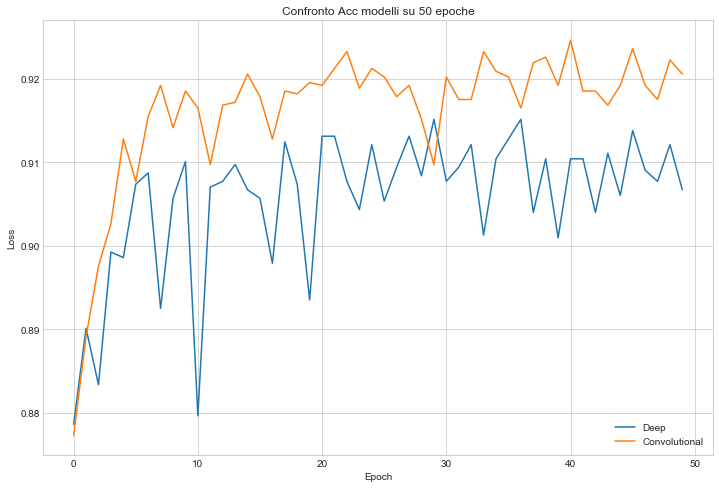

In [56]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize= (12,8))

plt.plot(history.history['val_acc'])
plt.plot(history3.history['val_acc'])
plt.title('Confronto Acc modelli su 50 epoche')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Deep', 'Convolutional'], loc='lower right')
plt.show()

### Il miglior modello convoluzionle ha accuracy sul validation maggiore rispetto al miglior modello deep

### Il modello convoluzionale raggiunge livelli più alti di accuracy sul validation, pertanto verrà utilizzato sul test.

In [57]:
predicted_classes = convol_model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [58]:
predicted_classes

array([3, 6, 5, ..., 6, 0, 6], dtype=int64)

Creo txt per la submission

In [59]:
diz = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J'}

In [60]:
preddf = pd.DataFrame(predicted_classes)

In [61]:
pred_letters = preddf.replace(diz)

In [62]:
pred_letters.head()

,0
0,D
1,G
2,F
3,E
4,E


In [63]:
pred_letters.rename(index=str, columns={0:"predicted_classes"}, inplace=True)

In [64]:
pred_letters.to_csv('davide_brinati_771458_score2.csv')